<a href="https://colab.research.google.com/github/followviny/Data-analysis/blob/main/dataset_analysis2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Personality Analysis

**Structure:**  <br>
    part 0 - info about names of columns <br>
    part 1 - basic info about the dataset and data cleanup <br>
    part 2 - simple plots to explore what the data looks like on the whole<br>
    part 3 - complicated plots with correlations and hypothesis <br>

**Content Description:**<br>

**People:**<br>

**ID:** Customer's unique identifier<br>
**Year_Birth:** Customer's birth year<br>
**Education:** Customer's education level<br>
**Marital_Status:** Customer's marital status<br>
**Income:** Customer's yearly household income<br>
**Kidhome:** Number of children in customer's household<br>
**Teenhome:** Number of teenagers in customer's household<br>
**Dt_Customer:** Date of customer's enrollment with the company<br>
**Recency:** Number of days since customer's last purchase<br>
**Complain:** 1 if the customer complained in the last 2 years, 0 otherwise<br>

**Products:**<br>

**MntWines:** Amount spent on wine in last 2 years<br>
**MntFruits:** Amount spent on fruits in last 2 years<br>
**MntMeatProducts:** Amount spent on meat in last 2 years<br>
**MntFishProducts:** Amount spent on fish in last 2 years<br>
**MntSweetProducts:** Amount spent on sweets in last 2 years<br>
**MntGoldProds:** Amount spent on gold in last 2 years<br>

**Promotion:**<br>

**NumDealsPurchases:** Number of purchases made with a discount<br>
**AcceptedCmp1:** 1 if customer accepted the offer in the 1st campaign, 0 otherwise<br>
**AcceptedCmp2:** 1 if customer accepted the offer in the 2nd campaign, 0 otherwise<br>
**AcceptedCmp3:** 1 if customer accepted the offer in the 3rd campaign, 0 otherwise<br>
**AcceptedCmp4:** 1 if customer accepted the offer in the 4th campaign, 0 otherwise<br>
**AcceptedCmp5:** 1 if customer accepted the offer in the 5th campaign, 0 otherwise<br>
**Response:** 1 if customer accepted the offer in the last campaign, 0 otherwise<br>

**Place:**<br>

**NumWebPurchases:** Number of purchases made through the company’s website<br>
**NumCatalogPurchases:** Number of purchases made using a catalogue<br>
**NumStorePurchases:** Number of purchases made directly in stores<br>
**NumWebVisitsMonth:** Number of visits to company’s website in the last month<br>

In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly as px


# 1. Basic info about the dataset and cleanup process

In [170]:
market_df = pd.read_csv("marketing_campaign.csv", sep="\t")

In [171]:
pd.set_option('display.max_columns', None)
market_df.head(10)  # checking what the dataset looks like

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [172]:
market_df.info()  #summary of a DataFrame


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [173]:
market_df.describe(include="all")  #description of the data in the DataFrame

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
unique,NaN,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,31-08-2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,NaN,NaN,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,NaN,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,NaN,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000


In [174]:
market_df.isnull().sum()  # the count of null values in each column

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [175]:
market_df['Income'].median()

51381.5

In [176]:
market_df['Income'].fillna(market_df['Income'].median() ,inplace=True)  # filling the values of NaN in the income column

In [177]:
market_df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,864
Together,580
Single,480
Divorced,232
Widow,77
Alone,3
Absurd,2
YOLO,2


In [178]:
market_df['Marital_Status'] = market_df['Marital_Status'].replace(['Married', 'Together'],'Relationship')  #generalizing marital status for conveniency

In [179]:
market_df['Marital_Status'] = market_df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')  #generalizing marital status for conveniency

In [180]:
print(market_df['Kidhome'].value_counts())
print(market_df['Teenhome'].value_counts())

Kidhome
0    1293
1     899
2      48
Name: count, dtype: int64
Teenhome
0    1158
1    1030
2      52
Name: count, dtype: int64


In [181]:
market_df['Kids'] = market_df['Kidhome'] + market_df['Teenhome']  # adding column with info about kids
market_df.drop(['Kidhome', 'Teenhome'], axis=1, inplace=True)  #let's remove these, they are now useless

In [182]:
market_df['Age'] = 2015 - market_df["Year_Birth"]  #converting birth year to age. The age is for 2015 bc the last record in dataset is 6th Dec 2014. Let's round to 2015

In [183]:
market_df['TotalAmountSpent'] = market_df['MntWines'] + market_df['MntFruits'] + market_df['MntMeatProducts']  #making column of total amount spent
+ market_df['MntFishProducts'] + market_df['MntSweetProducts'] + market_df['MntGoldProds']

market_df.rename(columns={'Response':'AcceptedCmp6'}, inplace=True)

market_df['TotalAcceptedDiscount'] = market_df['AcceptedCmp1'] + market_df['AcceptedCmp2'] + market_df['AcceptedCmp3'] # column total discounts
+ market_df['AcceptedCmp4'] + market_df['AcceptedCmp5'] + market_df['AcceptedCmp6']

market_df['TotalNumberPurchases'] = market_df['NumWebPurchases'] + market_df['NumCatalogPurchases']  # column total number of purchases
+ market_df['NumStorePurchases'] + market_df['NumDealsPurchases']

,0
0,7
1,4
2,11
3,6
4,11
...,...
2235,6
2236,12
2237,14
2238,12


In [184]:
market_df.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)  #deleting useless columns

In [185]:
market_df['Dt_Customer'] = pd.to_datetime(market_df['Dt_Customer'], dayfirst=True)  #creating total days spent column
market_df['l_day'] = '01-01-2015'
market_df['l_day'] = pd.to_datetime(market_df['l_day'])
market_df['DaysInCompany'] = (market_df['l_day'] - market_df['Dt_Customer']).dt.days
market_df.drop(['Dt_Customer', 'l_day'], axis=1, inplace=True)

In [186]:
market_df.insert(2, 'Age', market_df.pop('Age'))  # changing the order of columns
market_df.insert(5, 'Kids', market_df.pop('Kids'))

**Plotting important features to look for outliers**

<Figure size 640x480 with 0 Axes>

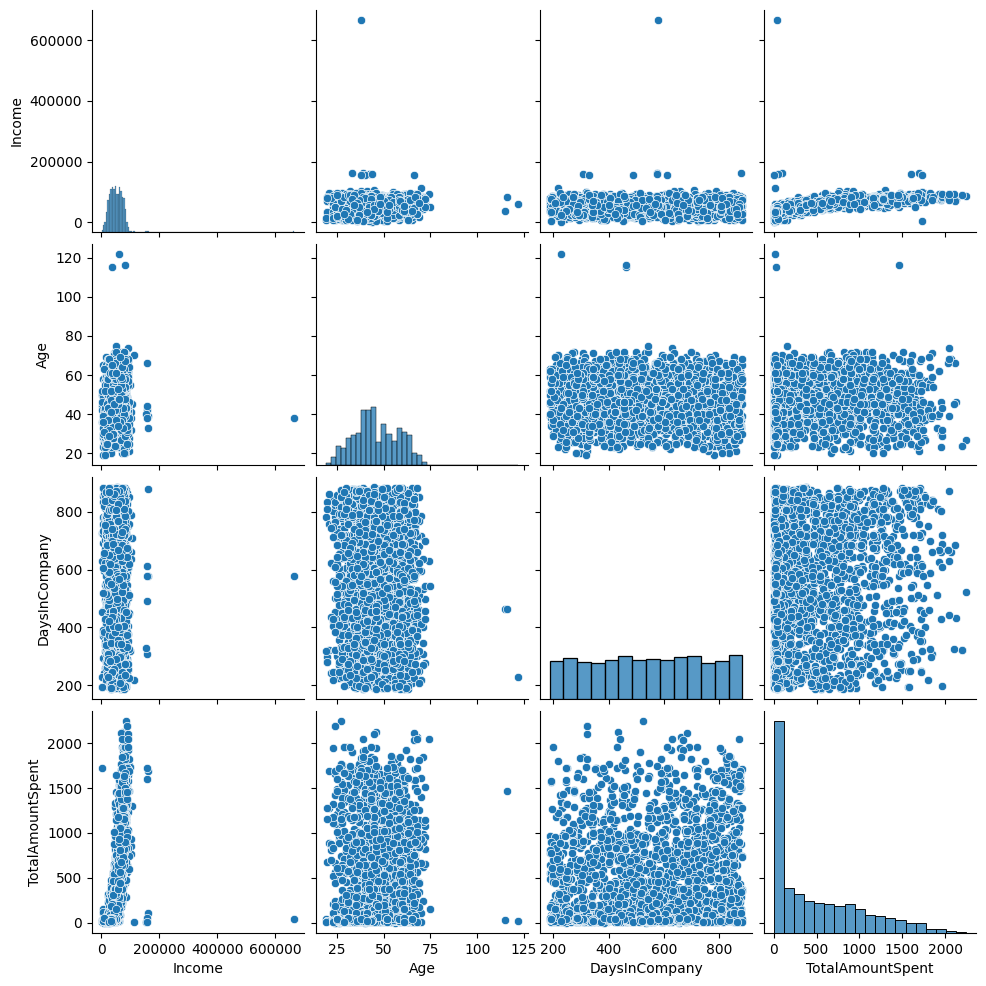

In [187]:
plot = [ 'Income', 'Age', 'DaysInCompany', 'TotalAmountSpent']
plt.figure()
sns.pairplot(market_df[plot])

In [188]:
market_df = market_df[market_df['Age'] < 100]  # removing the evident outlier values
market_df = market_df[market_df['Income'] < 150000]

In [189]:
market_df.loc[(market_df['Age'] < 13), 'Age_Group'] = 'Children'  # dividing people into groups by age
market_df.loc[(market_df['Age'] >= 13) & (market_df['Age'] < 20), 'Age_Group'] = 'Teenagers'
market_df.loc[(market_df['Age'] >= 20) & (market_df['Age'] < 40), 'Age_Group'] = 'Adults'
market_df.loc[(market_df['Age'] >= 40) & (market_df['Age'] < 60), 'Age_Group'] = 'Middle Aged people'
market_df.loc[(market_df['Age'] >= 60), 'Age_Group'] = 'Old people'
market_df.insert(3, 'Age_Group', market_df.pop('Age_Group'))  # changing order of columns

In [190]:
market_df.head(5)  # final look at the table

,ID,Year_Birth,Age,Age_Group,Education,Marital_Status,Kids,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmp6,TotalAmountSpent,TotalAcceptedDiscount,TotalNumberPurchases,DaysInCompany
0,5524,1957,58,Middle Aged people,Graduation,Single,0,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1269,0,18,849
1,2174,1954,61,Old people,Graduation,Single,2,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,18,0,2,299
2,4141,1965,50,Middle Aged people,Graduation,Relationship,0,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,602,0,10,498
3,6182,1984,31,Adults,Graduation,Relationship,1,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,35,0,2,325
4,5324,1981,34,Adults,PhD,Relationship,1,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,334,0,8,347


**The end of the first block.** <br>
**Summary1:**<br>
There's a lot of information in this dataset related to the customers. The data has been cleaned for conveniency in further explorations. Columns containing information on marital status and number of children have been modified to make them more usable in analysis by grouping the values falling under the same category. Useless columns were deleted. New columns were added to show the overall amount spent by clients, the total discount they received, and the total number of purchases. Clients were divided into age groups. Other minor operations with data, such as dates format changing were also completed. Outlier values were removed to improve the accuracy of the whole-data analysis.
<br>
This will help to explore the data more accurate and get meaningful results from it.

# 2. Some general ideas about the dataset with simple plots

**1. How does the age of the customers distribute?**

In [191]:
market_df['Age'].count()

2229

In [192]:
print(market_df['Age'].mean())
print(market_df['Age'].max())
print(market_df['Age'].min())

46.11126065500224
75
19


In [193]:
market_df['Age_Group'].describe()

,Age_Group
count,2229
unique,4
top,Middle Aged people
freq,1174


Text(0.5, 1.0, "Distribution of the Customer's Age")

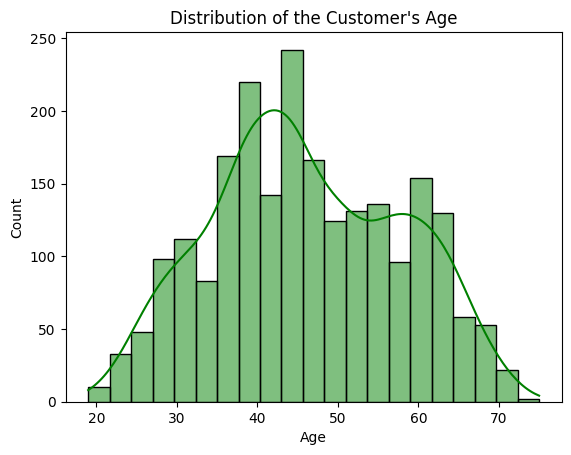

In [194]:
sns.histplot(data=market_df, x="Age", color='green', kde=True)
plt.title("Distribution of the Customer's Age")

Most of our customer's age distribution is between 40 and 60(middle-aged). The spread of age is between 19 and 75. The mean age is 46.1

**2. What is the the education level distribution among customers?**

In [195]:
market_df['Education'].value_counts()

,count
Education,
Graduation,1124
PhD,481
Master,369
2n Cycle,201
Basic,54


<ipython-input-196-cfb84f965383>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plb = sns.countplot(data = market_df, x = 'Education', palette = ("Set1"))


[Text(0.5, 0, 'Type of received education'),
 Text(0, 0.5, 'count of people'),
 Text(0.5, 1.0, 'Distribution of education among customers')]

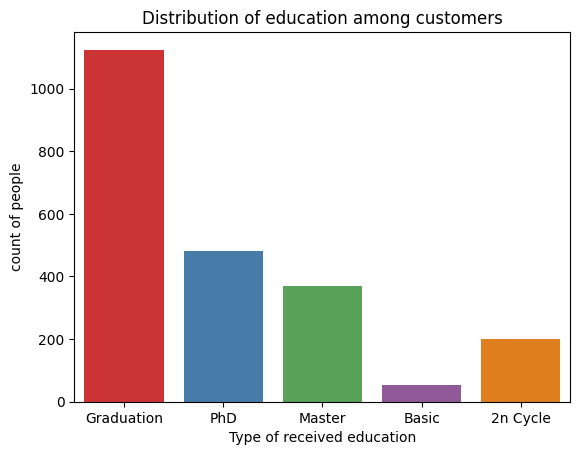

In [196]:
plb = sns.countplot(data = market_df, x = 'Education', palette = ("Set1"))
plb.set(xlabel = 'Type of received education', ylabel = 'count of people', title = "Distribution of education among customers")

The majority of customers have a graduate degree - Bachelor's. The second highest group includes people with PhD's. The smallest group is people with basic education.

**3. Let's look at the income distribution of the customers**

In [197]:
market_df['Income'].std()  # how dispersed the data is in relation to the mean

20601.216247967397

In [198]:
market_df['Income'].median()

51381.5

Text(0.5, 1.0, 'Distribution of income of customers $')

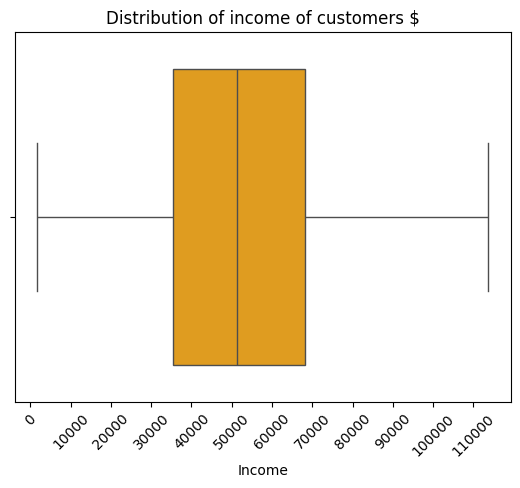

In [199]:
plt.xticks(np.arange(0, 140000, 10000))
plt.xticks(rotation=45)
sns.boxplot(x = market_df.Income, color = "orange").set_title('Distribution of income of customers $')

Most of the customers earn between 35000 and 70000 dollars per year, around 51000 dollars on average per person.

**4. Checking marital status and number of kids of customers**

<ipython-input-200-c1106bd92acf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax = ax[0], data = market_df, x = "Marital_Status", palette = "dark").set_title("Customers' marital status")
<ipython-input-200-c1106bd92acf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax = ax[1], data = market_df, x = "Kids", palette = "bright").set_title("Customers' number of kids")


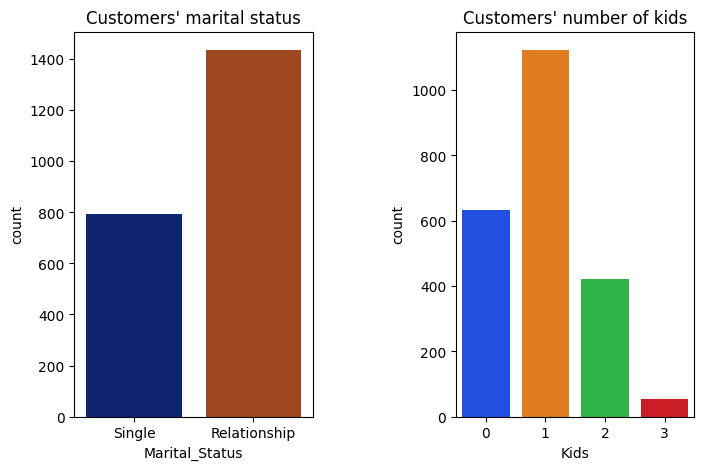

In [200]:
f, ax = plt.subplots(1,2, figsize = (8, 5))
sns.countplot(ax = ax[0], data = market_df, x = "Marital_Status", palette = "dark").set_title("Customers' marital status")
sns.countplot(ax = ax[1], data = market_df, x = "Kids", palette = "bright").set_title("Customers' number of kids")
plt.subplots_adjust(wspace = 0.6)

The number of customers in a relationship is almost double the number of single ones. The majority of customers have at least one child.

**The end of the second block.** <br>
**Summary2:**<br>
The dataset was analysed in this part using simple plots(histogram, bar chart, boxplot) to gain a basic knowledge of the consumers in the dataset. Looks like the majority of consumers are middle-aged adults with at least one kid, a graduate degree, and an annual income of roughly $ 51,000. Let's take a closer look at the data and explore correlation between different values now taking into account the info we already have.

# 3. Let's explore the data in more depth and look for correlations

**1. How does money spent by customers depend on income?**

Correlation coefficient (r): 0.8059053799804151
R-squared: 0.6494834814813772
The relationship between income and amount spent is statistically significant.


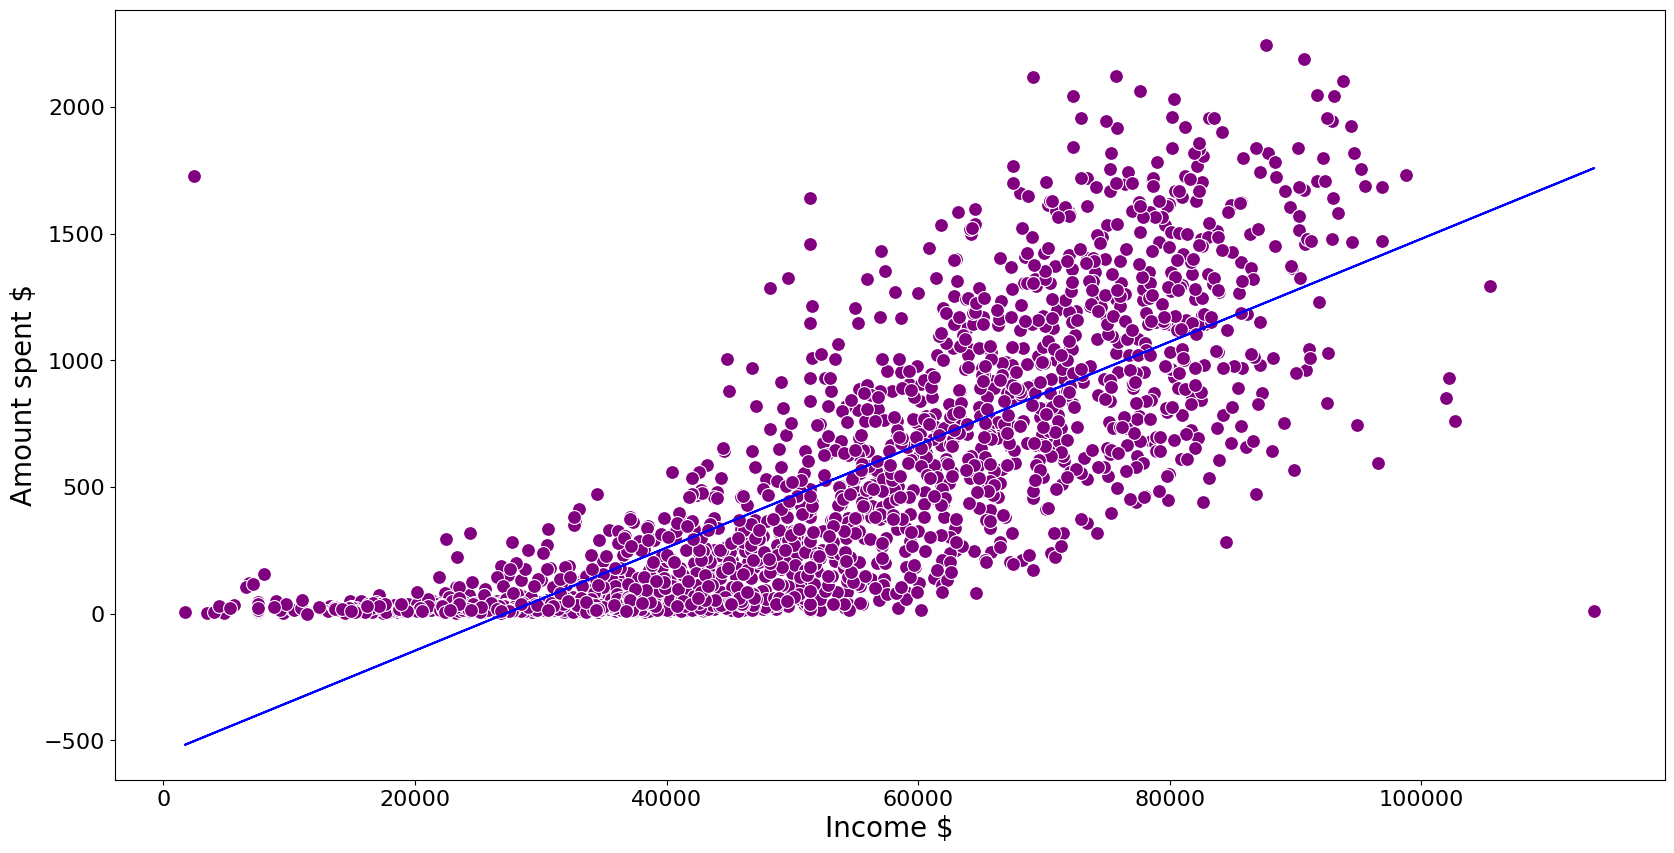

In [201]:
from scipy.stats import linregress
plt.figure(figsize=(20,10))


sns.scatterplot(x=market_df.Income, y=market_df.TotalAmountSpent, s=100, color='purple');
slope, intercept, r_value, p_value, std_err = linregress(market_df.Income, market_df.TotalAmountSpent)
plt.plot(market_df.Income, intercept + slope * market_df.Income, color='blue', label=f'Linear fit: y={intercept:.2f} + {slope:.2f}x')

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Income $', fontsize=20)
plt.ylabel('Amount spent $', fontsize=20)
print(f"Correlation coefficient (r): {r_value}")
print(f"R-squared: {r_value**2}")

if p_value < 0.05:
    print("The relationship between income and amount spent is statistically significant.")
else:
    print("The relationship between income and amount spent is not statistically significant.")

The relationship is clearly linear. Customers that have higher salaries tend to spend more money.

**2. Which products do customers spend the greatest amount of money on?**

    Type of product    spending
0         MntFruits   26.348587
1  MntSweetProducts   27.161507
2   MntFishProducts   37.642441
3      MntGoldProds   44.113055
4   MntMeatProducts  165.283984


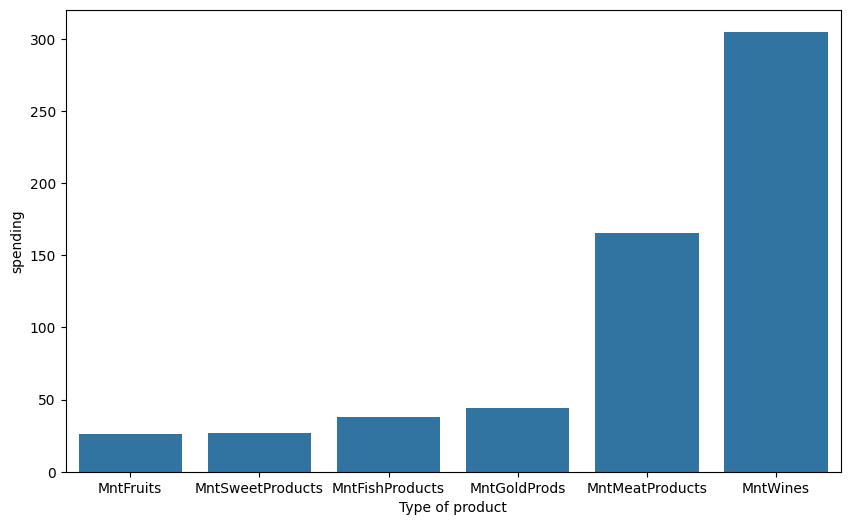

In [202]:
products = market_df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
mean_values = products.mean().sort_values()
mean_val_in_df = pd.DataFrame(list(mean_values.items()), columns=['Type of product', 'spending'])
print(mean_val_in_df.head())
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_val_in_df, x='Type of product', y='spending');


Looks like the greatest amount of money is spent on wine, followed by meat.

**3. Do purchases depend on age?**

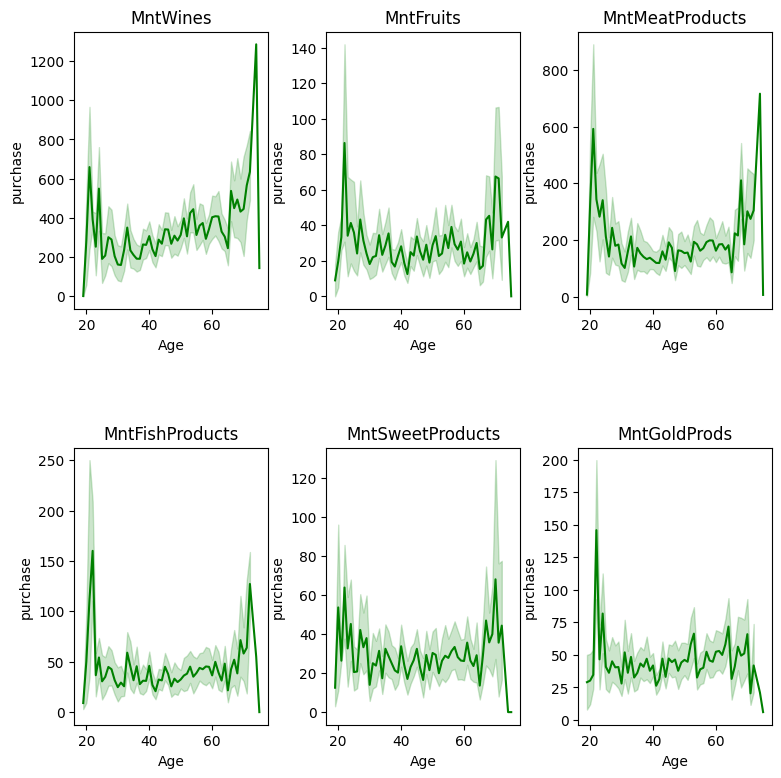

In [203]:
columns = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize = (9, 9))
axes = axes.flatten()
for col, ax in zip(columns, axes):
    ax.set_title(col)
    ax = sns.lineplot(data = market_df, x = 'Age', y = col, ax = ax, color='g')
    ax.set_ylabel('purchase')
    plt.subplots_adjust(hspace = 0.5, wspace = 0.3)

plt.show()

Although the most customers are middle-aged people(40-60), it seems like the dominating age group in terms of making purchases are old people. Wine is primarily purchased by elderly folks. Fish, fruits, sweets, and meat are usually purchased by younger individuals between the ages of 25 and 30, or by elderly persons. Gold is the only category in which most purchases are made by young people.

**4. Do people with 1 or more kids spend more than people without kids?**

   number_of_kids  average_spent
0               2     201.004762
1               3     242.301887
2               1     385.190561
3               0     911.756714


<ipython-input-204-808fdecbbfca>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=kids_spendings_df,  x="number_of_kids", y="average_spent", palette='mako')


<Axes: xlabel='number_of_kids', ylabel='average_spent'>

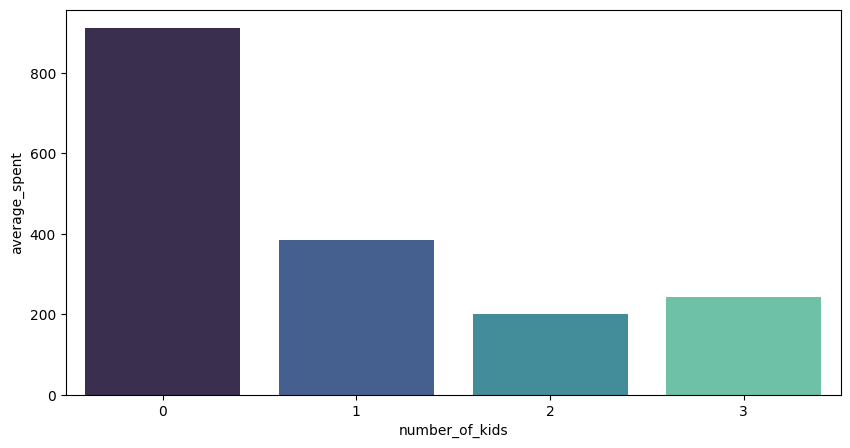

In [204]:
kids_spendings = market_df.groupby('Kids')['TotalAmountSpent'].mean().sort_values()
kids_spendings_df = pd.DataFrame(list(kids_spendings.items()), columns=['number_of_kids', 'average_spent'])
print(kids_spendings_df)
plt.figure(figsize=(10,5))
sns.barplot(data=kids_spendings_df,  x="number_of_kids", y="average_spent", palette='mako')

It turns out that customers not having kids unexpectedly spend way more money that others.

**5. What is the percent of customers who accepted the discount in different campaigns?**

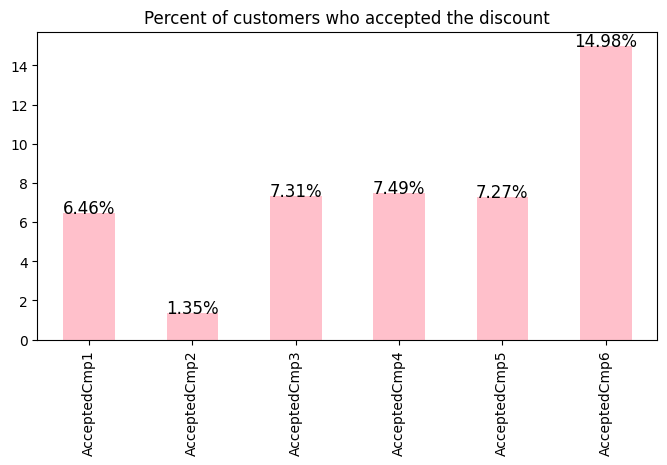

In [205]:
plt.figure(figsize=(8,4))
plt.title('Percent of customers who accepted the discount')

percent = market_df.sum()[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6']]*100 / len(market_df)
for x,y in enumerate(percent):
    plt.text(x, y, '{:.2f}%'.format(y), horizontalalignment='center',  fontsize=12)
ax = percent.plot.bar(color='pink')

The percentage of persons who accepted the offer in the first campaign was only 6.46%. The figure dropped even lower in the second campaign, with only 1.35% of consumers participating.
With 14.98% of clients, the most recent campaign successfully garnered the most customers compared to prior efforts.

**5. HYPOTHESIS: IS IT TRUE THAT CLIENTS WITH CHILDREN ARE MORE EASILY ENTICED BY DISCOUNTS?**

<Axes: title={'center': 'Average number of purchases with discount'}, xlabel='Age_Group', ylabel='NumDealsPurchases'>

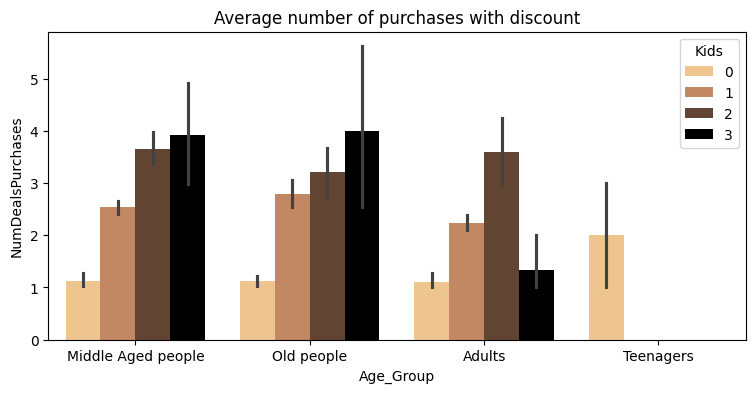

In [206]:
plt.figure(figsize=(9,4))
plt.title('Average number of purchases with discount')
sns.barplot(data=market_df, x='Age_Group', y='NumDealsPurchases', hue='Kids',palette='copper_r')

In [207]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
filtered_df = market_df[(market_df['Age'] >= 20)]
parents = filtered_df[filtered_df['Kids'] > 0]['NumDealsPurchases']
non_parents = filtered_df[filtered_df['Kids'] == 0]['NumDealsPurchases']

# Shapiro-Wilk Test for parents
shapiro_parents = stats.shapiro(parents)
shapiro_non_parents = stats.shapiro(non_parents)

def interpret_shapiro(test_result, group_name):
    p_value = test_result.pvalue
    if p_value > 0.05:
        print(f"The data for {group_name} is normally distributed.")
    else:
        print(f"The data for {group_name} is NOT normally distributed.")
interpret_shapiro(shapiro_parents, 'Parents')
interpret_shapiro(shapiro_non_parents, 'Non-Parents')


The data for Parents is NOT normally distributed.
The data for Non-Parents is NOT normally distributed.


Hypothesis (H₀): Customers with children (parents) and customers without children spend the same amount of money on average. \\

Alternative Hypothesis (H₁): Customers with children (parents) and customers without children spend different amounts of money on average.

In [208]:
from scipy.stats import mannwhitneyu

# Mann-Whitney U Test
u_statistic, p_value = mannwhitneyu(parents, non_parents, alternative='two-sided')
def interpret_mannwhitney(u_stat, p_val):
    if p_val < 0.05:
        print("There is a statistically significant difference between parents and non-parents in their response to discounts.")
    else:
        print("There is no statistically significant difference between parents and non-parents in their response to discounts.")

interpret_mannwhitney(u_statistic, p_value)



There is a statistically significant difference between parents and non-parents in their response to discounts.


Discounts are clearly more appealing to parents. It's evident from the graph above that in this scenario, the number of discounted purchases made by parents outnumbered non-parents. Of course not taking into account teenagers, who don't have kids.

**Summary3:** <br>
In general, income was shown to be the most important factor in determining how much a client will spend. Customers spend the greatest amounts of money on meat and wine. Purchases of various items vary by age category, but older individuals buy the more in practically every category. People who do not have children spend more money. In the early campaigns, discounts are poorly received. Parents are more inclined to take advantage of the discount.